In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered/PBMC_decon/All/perctcorr/methodsumary_newposscore/BL22_genepromSM_0.7.txt_TRAININGbestref.txt1stflow.txt'
#Cytof
#orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono','NaiveCD8','cm8','em8','ed8', 'nB','mB']

#Flow
orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono', 'nB','mB']
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,nB_real,NaiveCD4_real,NaiveCD8_real,Tregs_real,cm4_real,em4_real,cm8_real,em8_real,ed8_real,PC_real
Mixture,,,,,,,,,,,,,,,,,,,,,
healthy_NU-03-bulk-PBMC,426.272052,72.323616,49.742895,361.665501,19.269655,121.355239,116.558845,24.893288,97.600087,53.537293,...,0.052549,0.1395,0.2416,0.0028,0.101,0.048,0.019,0.089,0.054,0.0002
healthy_NU-14-bulk-PBMC,477.972932,118.712490,43.151935,467.951141,21.432662,114.420894,89.275187,23.744648,120.130106,46.228560,...,0.047287,0.1151,0.2385,0.0012,0.085,0.032,0.012,0.103,0.028,0.0001
healthy_NU-24-bulk-PBMC,639.671016,84.073688,40.998135,324.499712,16.794414,129.683513,113.231812,23.656056,113.905498,47.350567,...,0.047635,0.2475,0.1426,0.0044,0.093,0.051,0.010,0.072,0.045,0.0005
healthy_NU-31-bulk-PBMC,476.608171,87.374142,42.654327,594.338083,26.684424,114.812973,114.678223,26.017875,101.422825,45.952316,...,0.055825,0.1548,0.2393,0.0011,0.082,0.036,0.008,0.073,0.049,0.0001
healthy_NU-49-bulk-PBMC,531.930500,103.275266,41.871135,320.210369,20.927356,99.416938,108.680213,24.658069,100.364205,49.416930,...,0.069583,0.1274,0.2395,0.0019,0.084,0.066,0.012,0.082,0.045,0.0001
healthy_NU-50-bulk-PBMC,365.709899,56.926198,64.578980,402.117559,21.295937,201.110771,143.063795,25.814863,120.865198,65.863863,...,0.089854,0.1453,0.1083,0.0014,0.077,0.017,0.009,0.035,0.018,0.0013
healthy_NU-51-bulk-PBMC,403.278987,75.303689,37.797474,515.007445,19.370827,177.921469,126.647713,26.304241,104.990735,48.202690,...,0.038346,0.1061,0.0911,0.0021,0.056,0.035,0.004,0.030,0.021,0.0002


In [3]:
gt = []
est = []
for col in df.columns:
    if '_real' in col:
        gt.append(col[:-5])
    else:
        est.append(col)
        
cells = list(set(gt) & set(est))

In [4]:
pearson_dic = {}
spearman_dic = {}
for cell in cells:
    cell_arr = np.array(df[cell])
    pearson_dic[cell] = []
    spearman_dic[cell] = []
    for cell_real in cells:
        cell_real_arr = np.array(df[cell_real + '_real'])
        pearson_corr = pearsonr(cell_arr, cell_real_arr)[0]
        spearman_corr = spearmanr(cell_arr, cell_real_arr)[0]
        pearson_dic[cell].append(pearson_corr)
        spearman_dic[cell].append(spearman_corr)
        
df_pearson = pd.DataFrame.from_dict(pearson_dic, orient='index', columns=cells)
df_spearman = pd.DataFrame.from_dict(spearman_dic, orient='index', columns=cells)



In [5]:
standardnamedict={"NaiveCD4": "Naive CD4 T", "NaiveCD8": "Naive CD8 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'PC','cm8':'CD8 TCM','em8':'CD8 TEM','m8':'CD8 memory','ed8':'CD8 TEMRA','cm4':'CD4 TCM','em4':'CD4 TEM','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte','Er':'Erythrocyte'}

In [6]:



df_pearson=df_pearson.reindex(orderedcells)
df_pearson=df_pearson[orderedcells]

df_spearman=df_spearman.reindex(orderedcells)
df_spearman=df_spearman[orderedcells]



df_pearson.rename(columns=standardnamedict,inplace=True)
df_pearson.rename(index=standardnamedict,inplace=True)

df_spearman.rename(columns=standardnamedict,inplace=True)
df_spearman.rename(index=standardnamedict,inplace=True)

df_pearson.head()

,Naive CD4 T,CD4 TCM,CD4 TEM,Tregs,NK,Mono,Naive B,Memory B
Naive CD4 T,0.732124,0.443638,0.666570,0.637814,-0.268290,-0.642336,-0.306293,-0.156724
CD4 TCM,0.538806,0.304351,0.901443,0.675425,-0.558873,-0.562330,-0.205785,-0.277020
CD4 TEM,0.404938,0.857014,0.625944,0.390135,-0.522584,-0.330903,0.239104,-0.604836
Tregs,0.897182,0.194229,0.010998,0.761544,-0.420942,0.099644,0.021768,-0.608175
NK,-0.385906,-0.527834,-0.540435,-0.618958,0.949784,0.082071,-0.293534,0.495768


In [7]:
df_pearson.to_csv(file + '_pearson.txt', sep='\t')
df_spearman.to_csv(file + '_spearman.txt', sep='\t')

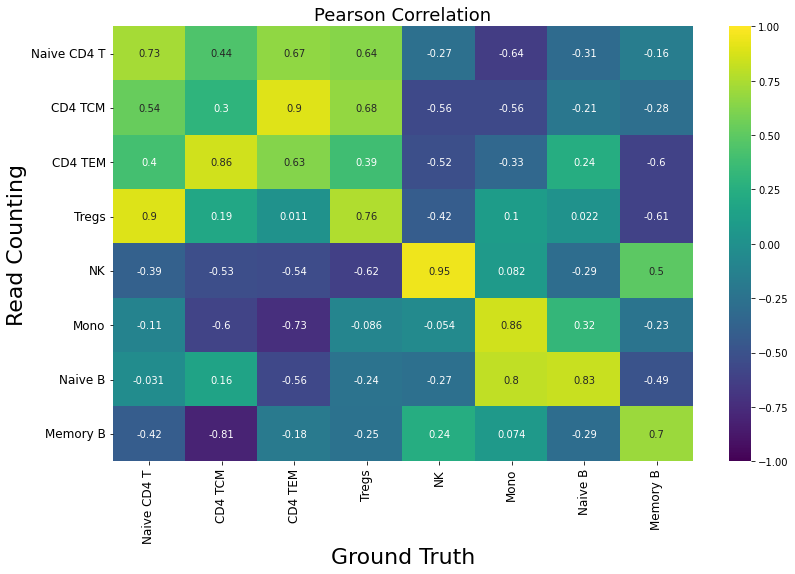

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax, vmin=-1, vmax=1)
ax.set_xlabel('Ground Truth', fontsize=22)
ax.set_ylabel('Read Counting', fontsize=22)
ax.set_title('Pearson Correlation', fontsize=18)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12,rotation=0)


plt.savefig(file + '_pearson.pdf', bbox_inches='tight')

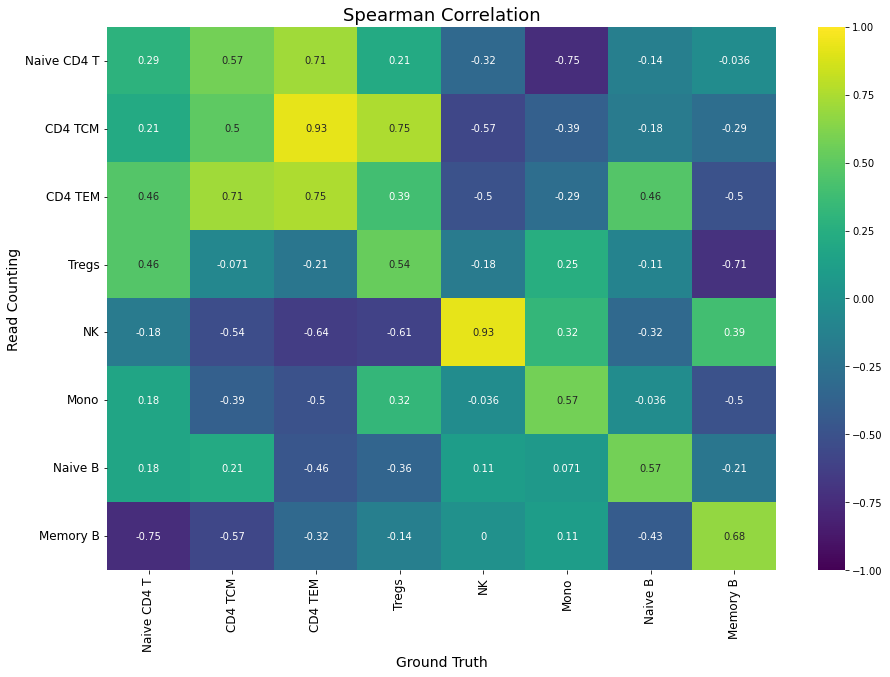

In [9]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax2, vmin=-1, vmax=1)
ax2.set_xlabel('Ground Truth', fontsize=14)
ax2.set_ylabel('Read Counting', fontsize=14)
ax2.set_title('Spearman Correlation', fontsize=18)

ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 12,rotation=0)

plt.savefig(file + '_spearman.pdf', bbox_inches='tight')